In [1]:
# Install R and R essentials
!apt-get update -qq
!apt-get install -y --no-install-recommends r-base
!apt-get install -y r-cran-essentials


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  r-cran-essentials
0 upgraded, 1 newly installed, 0 to remove and 56 not upgraded.
Need to get 42.3 kB of archives.
After this operation, 92.2 kB of additional disk space will be used.
Get:1 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 r-cran-essentials amd64 0.1.0-1.ca2204.1 [42.3 kB]
Fetched 42.3 kB in 0s (144 kB/s)
Selecting previously unselected package r-cran-essentials.
(Reading database ... 123629 files and directories currently in

In [3]:
!apt-get install -y r-base
!pip install rpy2==3.5.0  # Ensure compatibility with your Python version


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.0-cp310-cp310-linux_x86_64.whl size=314869 sha256=01edcd2cba9653a8bd3fc235182ce3e3c0aa21e8148e44fc1121999792a484cd
  Stored in directory: /root/.cache/pip/wheels/b9/59/1f/09d262edc0efb58a62641f6160d7be375e1a15d483ec3a50f0
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [4]:
%load_ext rpy2.ipython


In [6]:
# Run R code in Colab
%%R
install.packages("readr")
install.packages("ggplot2")
install.packages("dplyr")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpcajXDq/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpcajXDq/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpcajXDq/downloaded_packages’



In [7]:
from google.colab import files
uploaded = files.upload()


Saving weatherHistory.csv to weatherHistory.csv


In [8]:
%%R
library(readr)

# Load the uploaded dataset
weather_data <- read_csv("weatherHistory.csv") # Replace with your uploaded file name

# View the first few rows
head(weather_data)


Rows: 96453 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Formatted Date, Summary, Precip Type, Daily Summary
dbl (8): Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 12
  `Formatted Date`              Summary       `Precip Type` `Temperature (C)`
  <chr>                         <chr>         <chr>                     <dbl>
1 2006-04-01 00:00:00.000 +0200 Partly Cloudy rain                       9.47
2 2006-04-01 01:00:00.000 +0200 Partly Cloudy rain                       9.36
3 2006-04-01 02:00:00.000 +0200 Mostly Cloudy rain                       9.38
4 2006-04-01 03:00:00.000 +0200 Partly Cloudy rain                       8.29
5 2006-04-01 04:00:00.000 +0200 Mostly Cloudy rain                       8.76
6 2006-04-01 05:00:

In [12]:
%%R
# Convert 'Formatted Date' to POSIXct (DateTime format)
weather_data$`Formatted Date` <- as.POSIXct(weather_data$`Formatted Date`, format = "%Y-%m-%d %H:%M:%S.000 %z")

# Verify the conversion
str(weather_data$`Formatted Date`)
head(weather_data$`Formatted Date`)


 POSIXct[1:96453], format: "2006-03-31 22:00:00" "2006-03-31 23:00:00" "2006-04-01 00:00:00" ...
[1] "2006-03-31 22:00:00 UTC" "2006-03-31 23:00:00 UTC"
[3] "2006-04-01 00:00:00 UTC" "2006-04-01 01:00:00 UTC"
[5] "2006-04-01 02:00:00 UTC" "2006-04-01 03:00:00 UTC"


In [13]:
%%R
# Extract only the date part (without time)
weather_data$Date <- as.Date(weather_data$`Formatted Date`)

# Verify the changes
head(weather_data$Date)


[1] "2006-03-31" "2006-03-31" "2006-04-01" "2006-04-01" "2006-04-01"
[6] "2006-04-01"


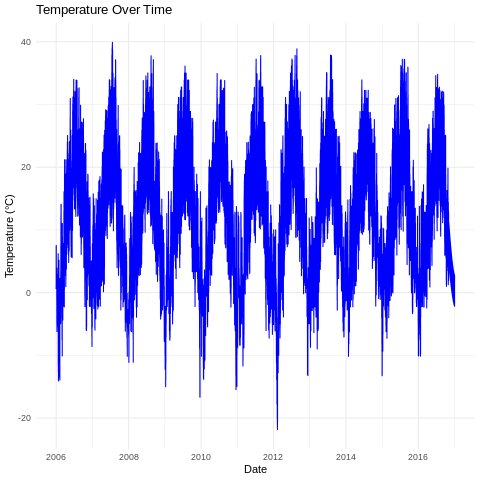

In [14]:
%%R
# Load ggplot2 for plotting
library(ggplot2)

# Plot Temperature Over Time
ggplot(weather_data, aes(x = Date, y = `Temperature (C)`)) +
  geom_line(color = "blue") +
  labs(title = "Temperature Over Time", x = "Date", y = "Temperature (°C)") +
  theme_minimal()


In [16]:
%%R
install.packages("forecast")
install.packages("tseries")
install.packages("ggplot2")


(as ‘lib’ is unspecified)
































































	‘/tmp/RtmpcajXDq/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpcajXDq/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpcajXDq/downloaded_packages’



In [21]:
%%R
# Convert Date column to Date format in R
weather_data$FormattedDate <- as.Date(weather_data$Date, format = "%Y-%m-%d")


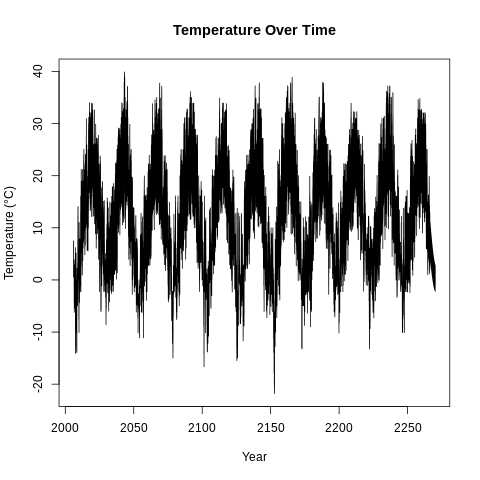

In [23]:
%%R
# Convert the temperature column to a time series object
temperature_ts <- ts(weather_data$`Temperature (C)`, frequency = 365, start = c(2006, 1))

# Plot the time series data
plot(temperature_ts, main = "Temperature Over Time", xlab = "Year", ylab = "Temperature (°C)")


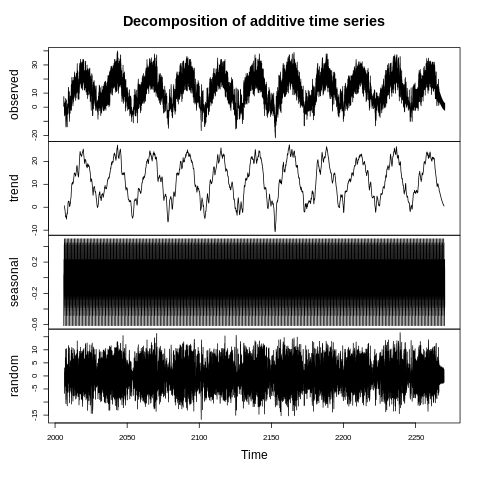

In [24]:
%%R
# Decompose the time series
decomposed_ts <- decompose(temperature_ts)

# Plot the decomposition
plot(decomposed_ts)


In [26]:
%%R
# Install tseries if not installed already
install.packages("tseries")

# Load the tseries library
library(tseries)

# Augmented Dickey-Fuller test to check stationarity
adf_test <- adf.test(temperature_ts)

# Print the test result
print(adf_test)

# If p-value > 0.05, the time series is non-stationary


(as ‘lib’ is unspecified)







	‘/tmp/RtmpcajXDq/downloaded_packages’

  method            from
  as.zoo.data.frame zoo 

    ‘tseries’ version: 0.10-58

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.





	Augmented Dickey-Fuller Test

data:  temperature_ts
Dickey-Fuller = -7.558, Lag order = 45, p-value = 0.01
alternative hypothesis: stationary



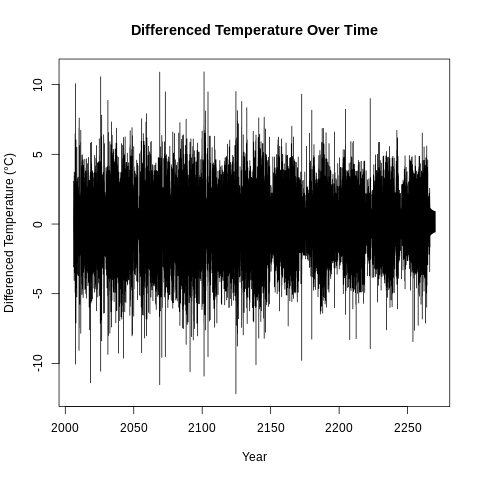

In [27]:
%%R
# Difference the data if it's non-stationary
temperature_ts_diff <- diff(temperature_ts)

# Plot the differenced time series
plot(temperature_ts_diff, main = "Differenced Temperature Over Time", xlab = "Year", ylab = "Differenced Temperature (°C)")


In [29]:
%%R
# Install the forecast package if not already installed
install.packages("forecast")

# Load the forecast package
library(forecast)

# Fit an ARIMA model
arima_model <- auto.arima(temperature_ts)

# Print the model summary
summary(arima_model)


(as ‘lib’ is unspecified)







	‘/tmp/RtmpcajXDq/downloaded_packages’



Series: temperature_ts 
ARIMA(5,0,0) with non-zero mean 

Coefficients:
         ar1      ar2      ar3      ar4     ar5     mean
      1.2539  -0.0388  -0.1540  -0.1133  0.0328  11.9327
s.e.  0.0032   0.0052   0.0051   0.0052  0.0032   0.2084

sigma^2 = 1.583:  log likelihood = -158999.9
AIC=318013.8   AICc=318013.8   BIC=318080.1

Training set error measures:
                        ME     RMSE       MAE MPE MAPE      MASE         ACF1
Training set -2.038551e-05 1.257982 0.8490025 NaN  Inf 0.1423151 -0.002080578


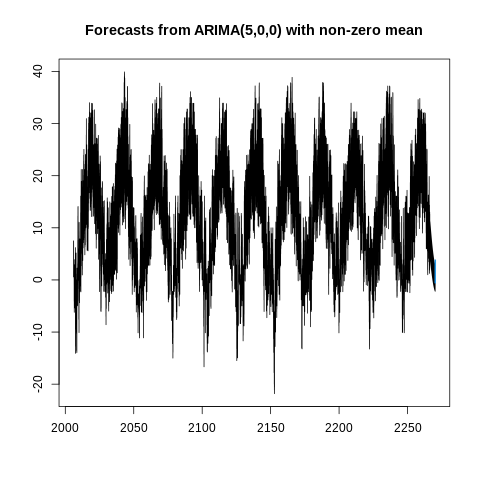

In [30]:
%%R
# Forecast the next 12 months
forecast_values <- forecast(arima_model, h = 12)

# Plot the forecast
plot(forecast_values)


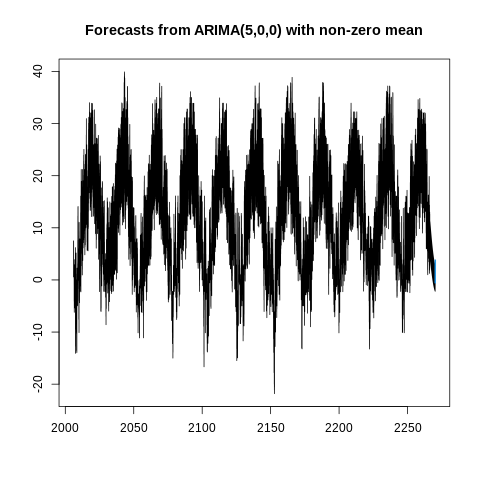

In [31]:
%%R
# Forecast the next 12 months
forecast_values <- forecast(arima_model, h = 12)

# Plot the forecast
plot(forecast_values)


In [32]:
%%R
# Check forecast accuracy (for training data comparison)
accuracy(forecast_values)


                        ME     RMSE       MAE MPE MAPE      MASE         ACF1
Training set -2.038551e-05 1.257982 0.8490025 NaN  Inf 0.1423151 -0.002080578


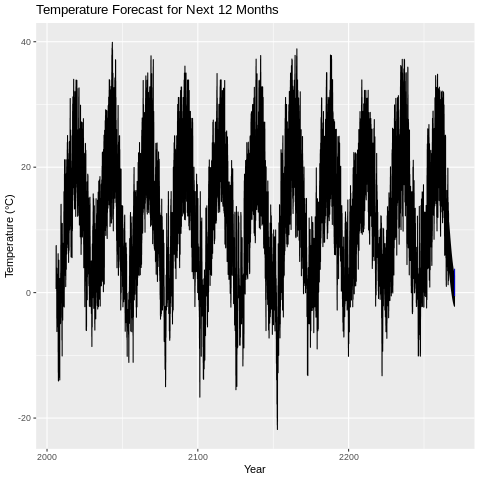

In [33]:
%%R
# Plot the forecast with confidence intervals
autoplot(forecast_values) +
  ggtitle("Temperature Forecast for Next 12 Months") +
  xlab("Year") +
  ylab("Temperature (°C)")


In [35]:
%%R
# Load required libraries
library(forecast)
library(tseries)

# Convert the 'Temperature (C)' column to time series
temperature_ts <- ts(weather_data$`Temperature (C)`, frequency = 365)  # Adjust frequency based on your dataset

# Augmented Dickey-Fuller test to check stationarity
adf_test <- adf.test(temperature_ts)
print(adf_test)

# Fit an ARIMA model
arima_model <- auto.arima(temperature_ts)

# Print the ARIMA model summary
summary(arima_model)



	Augmented Dickey-Fuller Test

data:  temperature_ts
Dickey-Fuller = -7.558, Lag order = 45, p-value = 0.01
alternative hypothesis: stationary

Series: temperature_ts 
ARIMA(5,0,0) with non-zero mean 

Coefficients:
         ar1      ar2      ar3      ar4     ar5     mean
      1.2539  -0.0388  -0.1540  -0.1133  0.0328  11.9327
s.e.  0.0032   0.0052   0.0051   0.0052  0.0032   0.2084

sigma^2 = 1.583:  log likelihood = -158999.9
AIC=318013.8   AICc=318013.8   BIC=318080.1

Training set error measures:
                        ME     RMSE       MAE MPE MAPE      MASE         ACF1
Training set -2.038551e-05 1.257982 0.8490025 NaN  Inf 0.1423151 -0.002080578
